#**CHALLENGE 2**


---




Telecom X - Análisis de Evasión de Clientes

Has sido contratado como asistente de análisis de datos en Telecom X y formarás parte del proyecto "Churn de Clientes". La empresa enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes.

Tu desafío será recopilar, procesar y analizar los datos, utilizando Python y sus principales bibliotecas para extraer información valiosa. A partir de tu análisis, el equipo de Data Science podrá avanzar en modelos predictivos y desarrollar estrategias para reducir la evasión.

#**1. Extracción de datos**


---




In [3]:
import pandas as pd
import numpy as np

In [4]:
# Extrae datos desde TelecomX_Data.json hacia DataFile datos1
try:
    datos1 = pd.read_json('/content/TelecomX_Data.json', encoding='latin-1')
except UnicodeDecodeError:
    try:
        datos1 = pd.read_json('/content/TelecomX_Data.json', encoding='ISO-8859-1')
    except UnicodeDecodeError:
         try:
             datos1 = pd.read_json('/content/TelecomX_Data.json', encoding='cp1252')
         except Exception as e:
             print(f"Could not decode the file with common encodings: {e}")

datos1.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [5]:
# Primera columna del DataFile
datos1['customerID']

,customerID
0,0002-ORFBO
1,0003-MKNFE
2,0004-TLHLJ
3,0011-IGKFF
4,0013-EXCHZ
...,...
7262,9987-LUTYD
7263,9992-RRAMN
7264,9992-UJOEL
7265,9993-LHIEB


In [6]:
# Segunda columna del DataFile
datos1['Churn']

,Churn
0,No
1,No
2,Yes
3,Yes
4,Yes
...,...
7262,No
7263,Yes
7264,No
7265,No


In [7]:
# Normaliza columna customer
datos2 = pd.json_normalize(datos1['customer'])
datos2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3


In [8]:
# Normaliza columna phone
datos3 = pd.json_normalize(datos1['phone'])
datos3.head()

,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No


In [9]:
# Normaliza columna internet
datos4 = pd.json_normalize(datos1['internet'])
datos4.head()

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No


In [10]:
# Normaliza columna account
datos5 = pd.json_normalize(datos1['account'])
datos5.head()

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.6,593.3
1,Month-to-month,No,Mailed check,59.9,542.4
2,Month-to-month,Yes,Electronic check,73.9,280.85
3,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Month-to-month,Yes,Mailed check,83.9,267.4


In [11]:
# Concatena todos las columnas hacia DataFile datos
datos = pd.concat([datos1['customerID'], datos1['Churn'], datos2, datos3, datos4, datos5], axis = 1)
datos

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [12]:
# Muestra columnas del DataFile datos
datos.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

In [13]:
# Muestra cantidad de filas y columnas del DataFile datos
datos.shape

(7267, 21)

In [14]:
# Muestra información del DataFile datos
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


#**2. Transformación de datos**

In [15]:
# Convierte el tipo de datos de la columna Charges.Total
datos['Charges.Total'] = pd.to_numeric(datos['Charges.Total'], errors='coerce')

In [16]:
# Muestra información del DataFile datos
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [17]:
# Muestra descripción del DataFile datos
datos.describe()

,SeniorCitizen,tenure,Charges.Monthly,Charges.Total
count,7267.000000,7267.000000,7267.000000,7256.000000
mean,0.162653,32.346498,64.720098,2280.634213
std,0.369074,24.571773,30.129572,2268.632997
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.425000,400.225000
50%,0.000000,29.000000,70.300000,1391.000000
75%,0.000000,55.000000,89.875000,3785.300000
max,1.000000,72.000000,118.750000,8684.800000


Estas funciones nos ayudan a garantizar que los datos estén limpios y listos para un análisis confiable.
A continuación veremos ejemplos prácticos de cómo aplicar estas funciones sin modificar el DataFrame original.

In [18]:
# Verifica valores nulos en cada columna
datos.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [19]:
# Muestra total de filas por cada valor de la columna tenure
datos.groupby(['tenure'])['tenure'].count()

,tenure
tenure,
0,11
1,634
2,246
3,207
4,185
...,...
68,104
69,100
70,122


In [20]:
# Muestra que las 11 filas de la columna Charges.Total correspondan cuando tenure es 0
condicion = datos['tenure'] == 0
datos[['tenure','Charges.Total']][condicion]

,tenure,Charges.Total
975,0,NaN
1775,0,NaN
1955,0,NaN
2075,0,NaN
2232,0,NaN
2308,0,NaN
2930,0,NaN
3134,0,NaN
3203,0,NaN
4169,0,NaN


In [21]:
# Rellena valores nulos con un valor específico
datos['Charges.Total'] = datos['Charges.Total'].fillna(0)

In [22]:
# Busca valores en blanco con un valor específico
condicion = datos['Churn'] == ''
datos[['tenure','Charges.Total','Churn']][condicion]

,tenure,Charges.Total,Churn
30,11,929.30,
75,71,1355.10,
96,29,1696.20,
98,5,287.85,
175,65,6792.45,
...,...,...,...
7158,14,773.20,
7180,49,2070.75,
7211,9,684.85,
7239,67,1372.90,


In [23]:
# Busca valores en blanco con un valor específico
datos['Churn'] = datos['Churn'].replace('','Yes')

In [24]:
# Busca valores en blanco con un valor específico
condicion = datos['Churn'] == ''
datos[['tenure','Charges.Total','Churn']][condicion]

,tenure,Charges.Total,Churn


In [25]:
# Muestra que las 11 filas de la columna Charges.Total que corresponden a tenure igual 0 quedaron con valor 0.0
condicion = datos['tenure'] == 0
datos[['tenure','Charges.Total']][condicion]

,tenure,Charges.Total
975,0,0.0
1775,0,0.0
1955,0,0.0
2075,0,0.0
2232,0,0.0
2308,0,0.0
2930,0,0.0
3134,0,0.0
3203,0,0.0
4169,0,0.0


In [26]:
# Muestra todas las filas y columnas de DataFile datos
datos

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [27]:
# Verifica valores nulos en cada columna
datos.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [28]:
# Muestra descripción del DataFile datos
datos.describe()

,SeniorCitizen,tenure,Charges.Monthly,Charges.Total
count,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098,2277.182035
std,0.369074,24.571773,30.129572,2268.648587
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.425000,396.200000
50%,0.000000,29.000000,70.300000,1389.200000
75%,0.000000,55.000000,89.875000,3778.525000
max,1.000000,72.000000,118.750000,8684.800000


In [29]:
# Muestra cantidad de filas del DataFile datos agrupada por la columna tenure
datos.groupby(['tenure'])['tenure'].count()

,tenure
tenure,
0,11
1,634
2,246
3,207
4,185
...,...
68,104
69,100
70,122


In [30]:
# Verifica registros duplicados
datos.duplicated().sum()

np.int64(0)

#**3. Carga de datos**

In [31]:
# Prepara el ambiente para los gráficos
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
# Estilo de los gráficos
sns.set(style="whitegrid")

In [33]:
# Genera DataFile datos_gra1 con aquellas filas con columna Churn igual a "Yes" (contratos terminados)
condicion = datos['Churn'] == "Yes"
datos_gra1 = datos[condicion]

In [34]:
# Genera DataFile datos_gra1 con aquellas filas con columna Churn igual a "No" (contratos vigentes)
condicion = datos['Churn'] == "No"
datos_gra2 = datos[condicion]

In [35]:
datos_gra1.groupby(['gender'])['Churn'].count()

,Churn
gender,
Female,1043
Male,1050


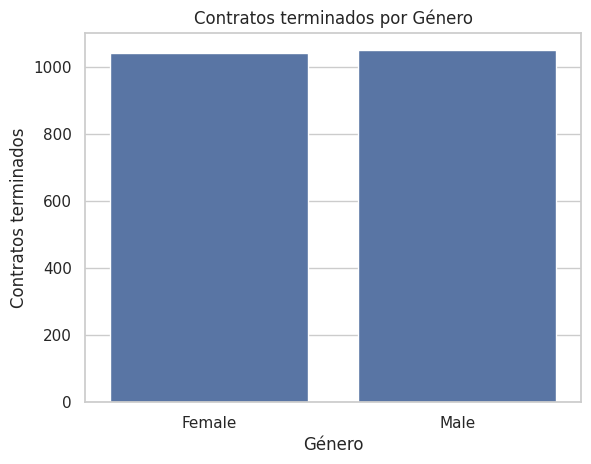

In [36]:
# Gráfico de Contratos terminados por Género
datos_gender = datos_gra1.groupby("gender").count()
sns.barplot(data=datos_gender, x="gender", y="Churn")
plt.title("Contratos terminados por Género")
plt.ylabel("Contratos terminados")
plt.xlabel("Género")
plt.show()

In [37]:
datos_gra2.groupby(['gender'])['Churn'].count()

,Churn
gender,
Female,2549
Male,2625


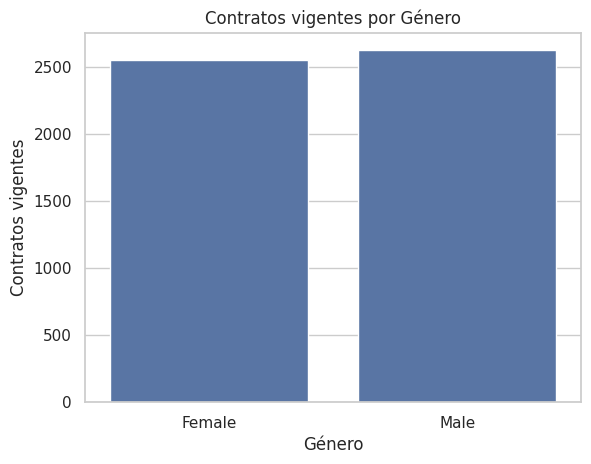

In [38]:
# Gráfico de Contratos vigentes por Género
datos_gender = datos_gra2.groupby("gender").count()
sns.barplot(data=datos_gender, x="gender", y="Churn")
plt.title("Contratos vigentes por Género")
plt.ylabel("Contratos vigentes")
plt.xlabel("Género")
plt.show()

In [39]:
datos_gra1.groupby(['SeniorCitizen'])['Churn'].count()

,Churn
SeniorCitizen,
0,1577
1,516


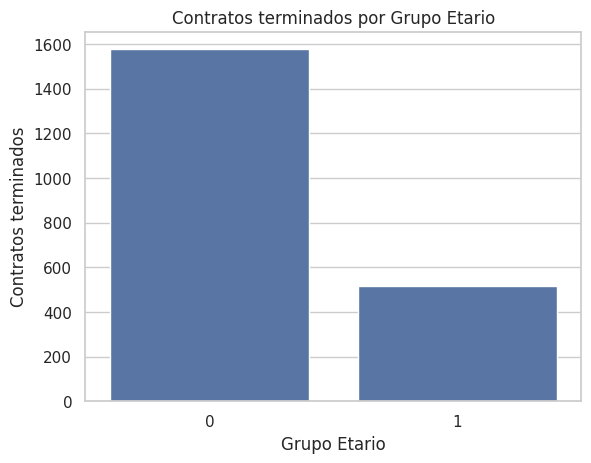

In [40]:
# Gráfico de Contratos terminados por Grupo Etario
datos_edad = datos_gra1.groupby("SeniorCitizen").count()
sns.barplot(data=datos_edad, x="SeniorCitizen", y="Churn")
plt.title("Contratos terminados por Grupo Etario")
plt.ylabel("Contratos terminados")
plt.xlabel("Grupo Etario")
plt.show()

In [41]:
datos_gra2.groupby(['SeniorCitizen'])['Churn'].count()

,Churn
SeniorCitizen,
0,4508
1,666


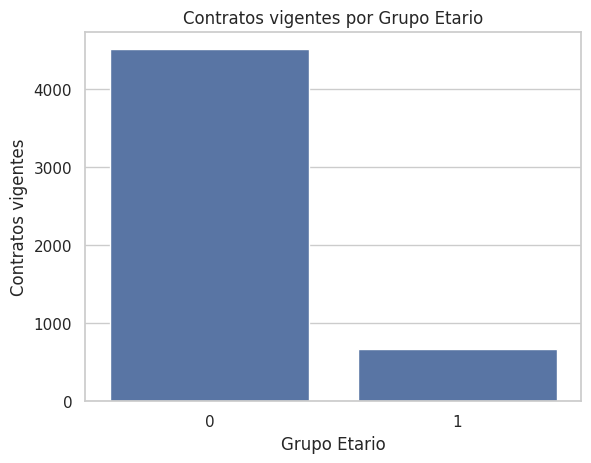

In [42]:
# Gráfico de Contratos vigentes por Grupo Etario
datos_edad = datos_gra2.groupby("SeniorCitizen").count()
sns.barplot(data=datos_edad, x="SeniorCitizen", y="Churn")
plt.title("Contratos vigentes por Grupo Etario")
plt.ylabel("Contratos vigentes")
plt.xlabel("Grupo Etario")
plt.show()

In [43]:
datos_gra1.groupby(['Partner'])['Churn'].count()

,Churn
Partner,
No,1308
Yes,785


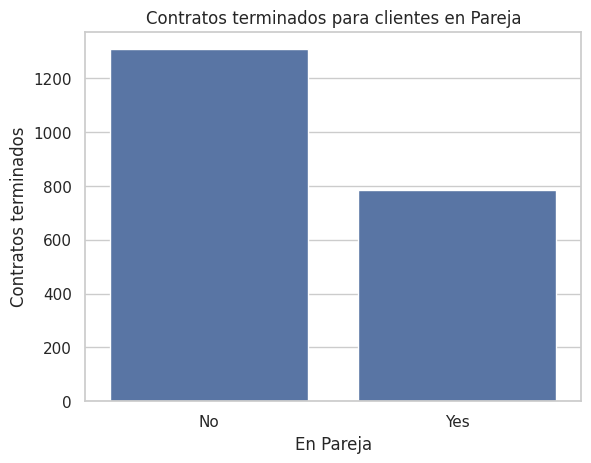

In [44]:
# Gráfico de Contratos terminados para clientes en Pareja
datos_pareja = datos_gra1.groupby("Partner").count()
sns.barplot(data=datos_pareja, x="Partner", y="Churn")
plt.title("Contratos terminados para clientes en Pareja")
plt.ylabel("Contratos terminados")
plt.xlabel("En Pareja")
plt.show()

In [45]:
datos_gra2.groupby(['Partner'])['Churn'].count()

,Churn
Partner,
No,2441
Yes,2733


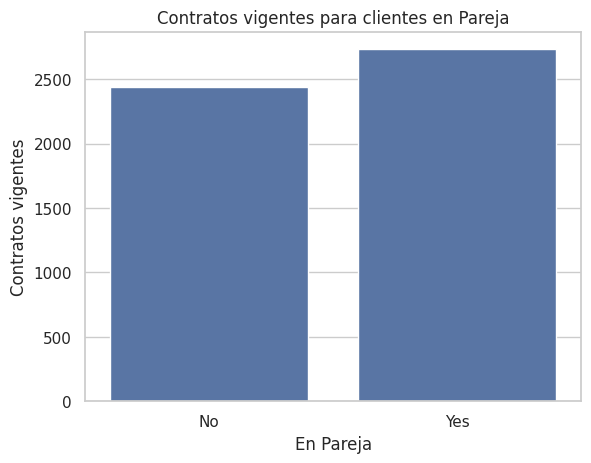

In [46]:
# Gráfico de Contratos vigentes para clientes en Pareja
datos_pareja = datos_gra2.groupby("Partner").count()
sns.barplot(data=datos_pareja, x="Partner", y="Churn")
plt.title("Contratos vigentes para clientes en Pareja")
plt.ylabel("Contratos vigentes")
plt.xlabel("En Pareja")
plt.show()

In [47]:
datos_gra1.groupby(['Dependents'])['Churn'].count()

,Churn
Dependents,
No,1696
Yes,397


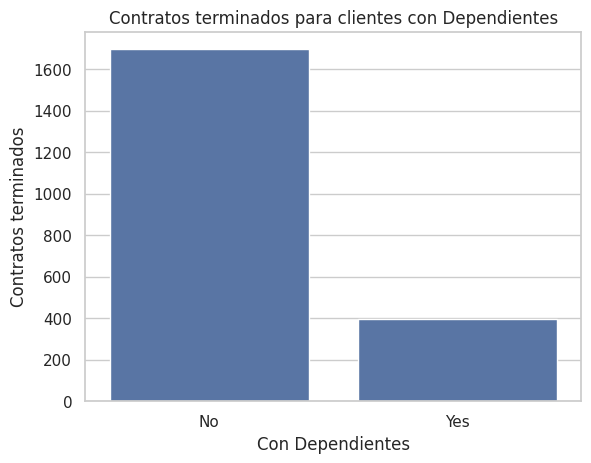

In [48]:
# Gráficos de Contratos terminados para clientes con Dependientes
datos_dependientes = datos_gra1.groupby("Dependents").count()
sns.barplot(data=datos_dependientes, x="Dependents", y="Churn")
plt.title("Contratos terminados para clientes con Dependientes")
plt.ylabel("Contratos terminados")
plt.xlabel("Con Dependientes")
plt.show()

In [49]:
datos_gra2.groupby(['Dependents'])['Churn'].count()

,Churn
Dependents,
No,3390
Yes,1784


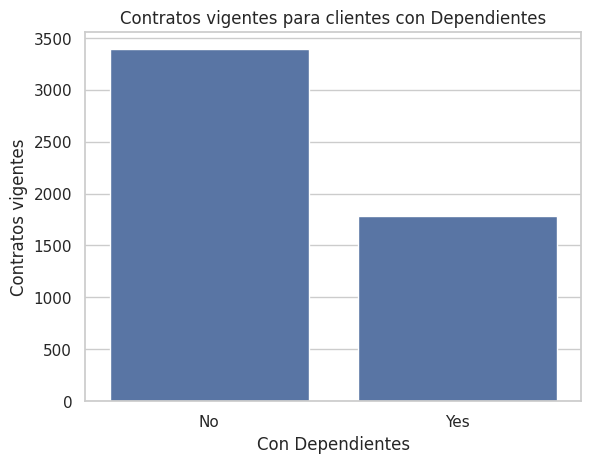

In [50]:
# Gráfico de Contratos vigentes para clientes con Dependientes
datos_dependientes = datos_gra2.groupby("Dependents").count()
sns.barplot(data=datos_dependientes, x="Dependents", y="Churn")
plt.title("Contratos vigentes para clientes con Dependientes")
plt.ylabel("Contratos vigentes")
plt.xlabel("Con Dependientes")
plt.show()

In [51]:
datos_gra1.groupby(['tenure'])['Churn'].count()

,Churn
tenure,
1,401
2,131
3,101
4,92
5,69
...,...
68,13
69,13
70,14


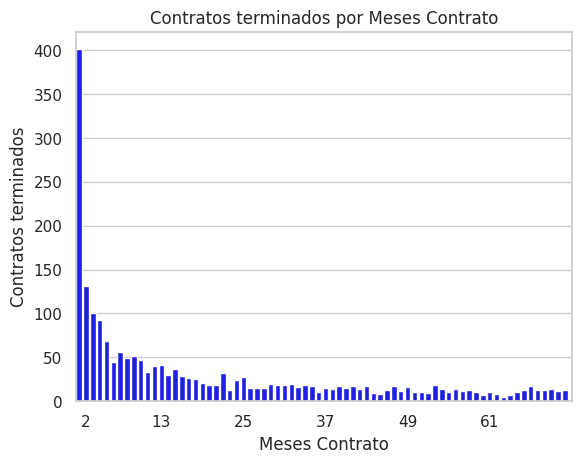

In [52]:
# Gráfico de Contratos terminados por Meses Contrato
datos_meses = datos_gra1.groupby("tenure").count()
sns.barplot(data=datos_meses, x="tenure", y="Churn", color="blue")
plt.title("Contratos terminados por Meses Contrato")
plt.ylabel("Contratos terminados")
plt.xlabel("Meses Contrato")
plt.xticks([1, 12, 24, 36, 48, 60, 72])
plt.show()

In [53]:
datos_gra2.groupby(['tenure'])['Churn'].count()

,Churn
tenure,
0,11
1,233
2,115
3,106
4,93
...,...
68,91
69,87
70,108


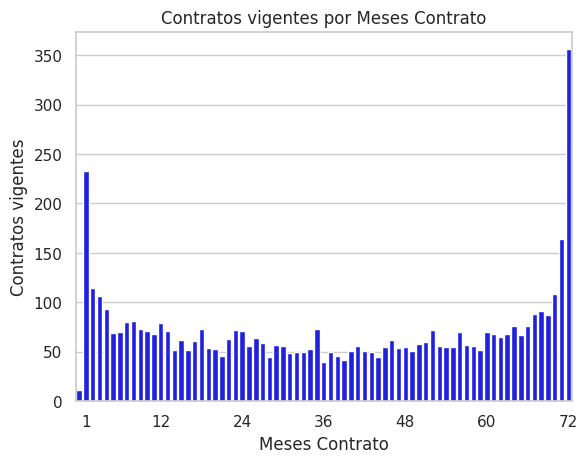

In [54]:
# Gráfico de Contratos vigentes por Meses Contrato
datos_meses = datos_gra2.groupby("tenure").count()
sns.barplot(data=datos_meses, x="tenure", y="Churn", color="blue")
plt.title("Contratos vigentes por Meses Contrato")
plt.ylabel("Contratos vigentes")
plt.xlabel("Meses Contrato")
plt.xticks([1, 12, 24, 36, 48, 60, 72])
plt.show()

In [55]:
# Genera DataFile datos_gra3 con aquellas filas con columna tenure menor o igual a 12 (contratos terminados)
condicion = (datos['Churn'] == "Yes") & (datos['tenure'] <= 12)
datos_gra3 = datos[condicion]

In [56]:
datos_gra3.groupby(['tenure'])['Churn'].count()

,Churn
tenure,
1,401
2,131
3,101
4,92
5,69
6,45
7,56
8,49
9,52


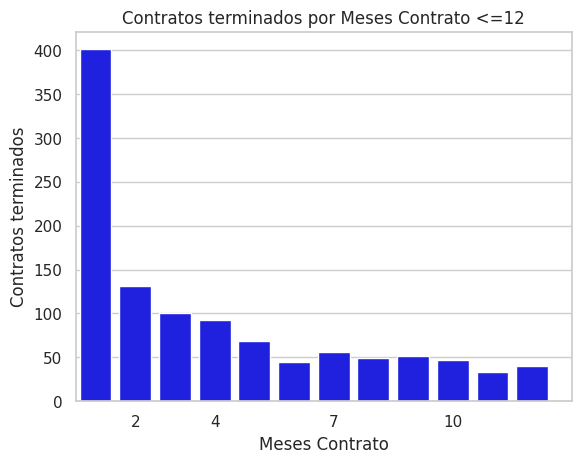

In [57]:
# Gráfico de Contratos terminados por Meses Contrato <= 12
datos_meses = datos_gra3.groupby("tenure").count()
sns.barplot(data=datos_meses, x="tenure", y="Churn", color="blue")
plt.title("Contratos terminados por Meses Contrato <=12")
plt.ylabel("Contratos terminados")
plt.xlabel("Meses Contrato")
plt.xticks([1, 3, 6, 9, 12])
plt.show()

In [58]:
# Genera DataFile datos_gra4 con aquellas filas con columna tenure menor o igual a 12 (contratos filar)
condicion = (datos['Churn'] == "No") & (datos['tenure'] <= 12)
datos_gra4 = datos[condicion]

In [59]:
datos_gra4.groupby(['tenure'])['Churn'].count()

,Churn
tenure,
0,11
1,233
2,115
3,106
4,93
5,69
6,70
7,80
8,81


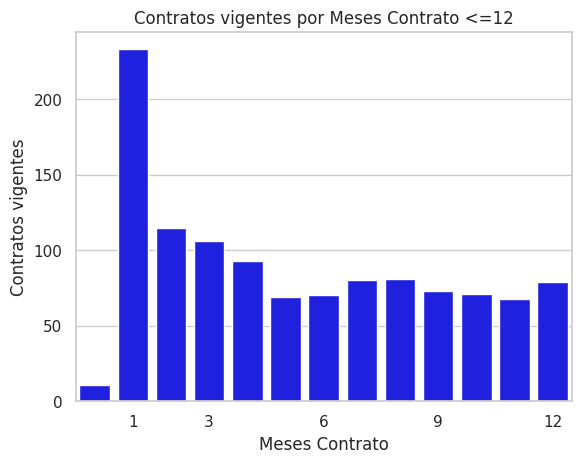

In [60]:
# Gráfico de Contratos vigentes por Meses Contrato <= 12
datos_meses = datos_gra4.groupby("tenure").count()
sns.barplot(data=datos_meses, x="tenure", y="Churn", color="blue")
plt.title("Contratos vigentes por Meses Contrato <=12")
plt.ylabel("Contratos vigentes")
plt.xlabel("Meses Contrato")
plt.xticks([1, 3, 6, 9, 12])
plt.show()

In [61]:
# Muestra total de filas por cada valor de la columna Churn
datos.groupby(['Churn'])['Churn'].count()

,Churn
Churn,
No,5174
Yes,2093


<ipython-input-70-0917df294326>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos_bin = datos[servicios].replace({ 'Yes': 1, 'No': 0, 'Male': 0, 'Female': 1, 'No internet service': 0, 'DSL': 1, 'Fiber optic': 1, 'No phone service': 0 })


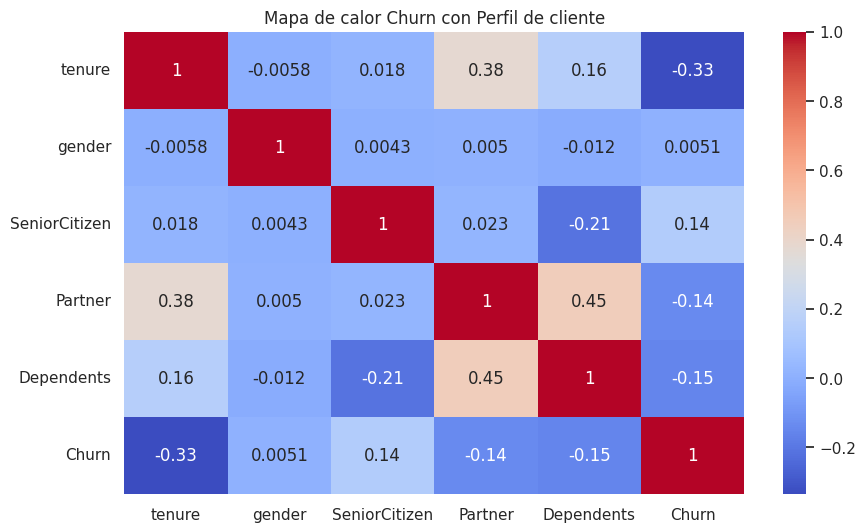

In [70]:
# Mapa de calor Churn con Perfil de cliente
plt.rcParams["figure.figsize"] = (10, 6)
servicios = ['tenure', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Churn']
datos_bin = datos[servicios].replace({ 'Yes': 1, 'No': 0, 'Male': 0, 'Female': 1, 'No internet service': 0, 'DSL': 1, 'Fiber optic': 1, 'No phone service': 0 })
corr = datos_bin.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Mapa de calor Churn con Perfil de cliente")
plt.show()

<ipython-input-65-e7a377739a00>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos_bin = datos[servicios].replace({ 'Yes': 1, 'No': 0, 'Male': 0, 'Female': 1, 'No internet service': 0, 'DSL': 1, 'Fiber optic': 1, 'No phone service': 0 })


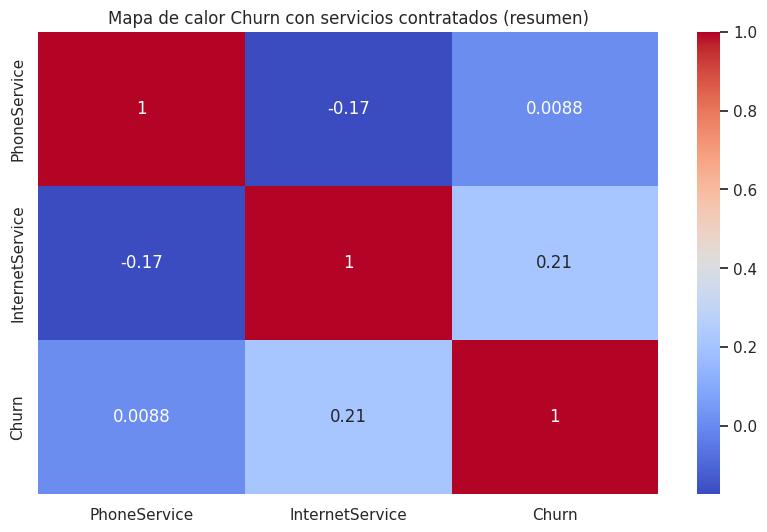

In [65]:
# Mapa de calor Churn con servicios contratados (resumen)
plt.rcParams["figure.figsize"] = (10, 6)
servicios = ['PhoneService', 'InternetService', 'Churn']
datos_bin = datos[servicios].replace({ 'Yes': 1, 'No': 0, 'Male': 0, 'Female': 1, 'No internet service': 0, 'DSL': 1, 'Fiber optic': 1, 'No phone service': 0 })
corr = datos_bin.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Mapa de calor Churn con servicios contratados (resumen)")
plt.show()

<ipython-input-66-7ed62ba894b0>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos_bin = datos[servicios].replace({ 'Yes': 1, 'No': 0, 'Male': 0, 'Female': 1, 'No internet service': 0, 'DSL': 1, 'Fiber optic': 1, 'No phone service': 0 })


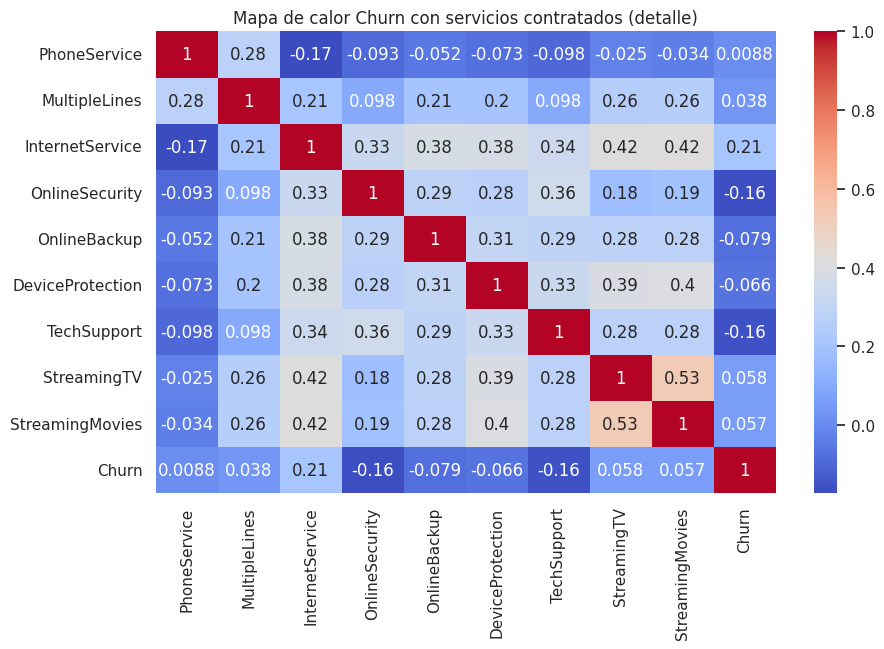

In [66]:
# Mapa de calor Churn con servicios contratados (detalle)
plt.rcParams["figure.figsize"] = (10, 6)
servicios = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Churn']
datos_bin = datos[servicios].replace({ 'Yes': 1, 'No': 0, 'Male': 0, 'Female': 1, 'No internet service': 0, 'DSL': 1, 'Fiber optic': 1, 'No phone service': 0 })
corr = datos_bin.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Mapa de calor Churn con servicios contratados (detalle)")
plt.show()

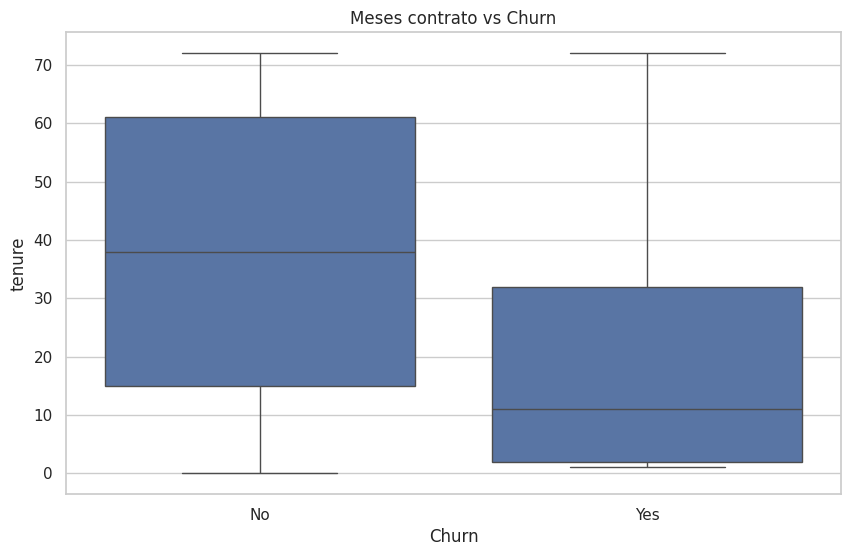

In [67]:
# Meses contrato vs Churn
plt.rcParams["figure.figsize"] = (10, 6)
sns.boxplot(data=datos, x="Churn", y="tenure")
plt.title("Meses contrato vs Churn")
plt.show()

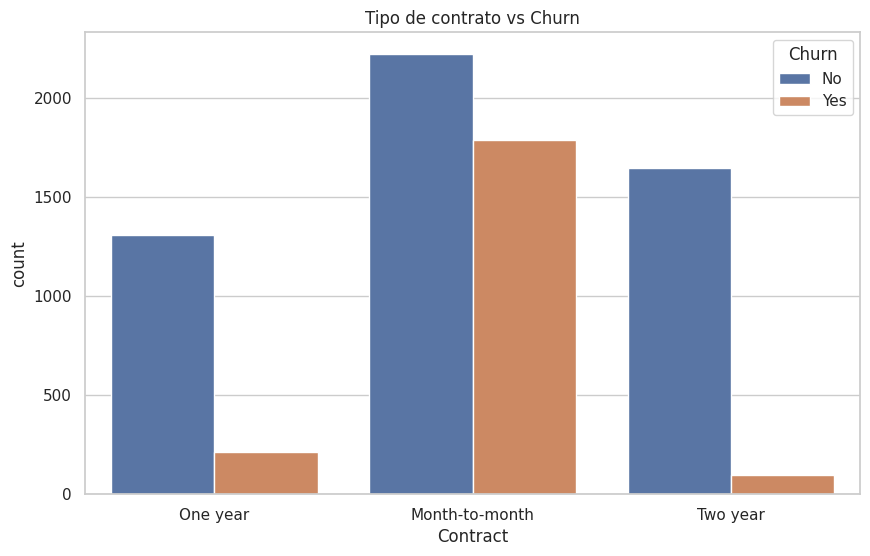

In [68]:
# Tipo de contrato vs Churn
plt.rcParams["figure.figsize"] = (10, 6)
sns.countplot(data=datos, x="Contract", hue="Churn")
plt.title("Tipo de contrato vs Churn")
plt.show()

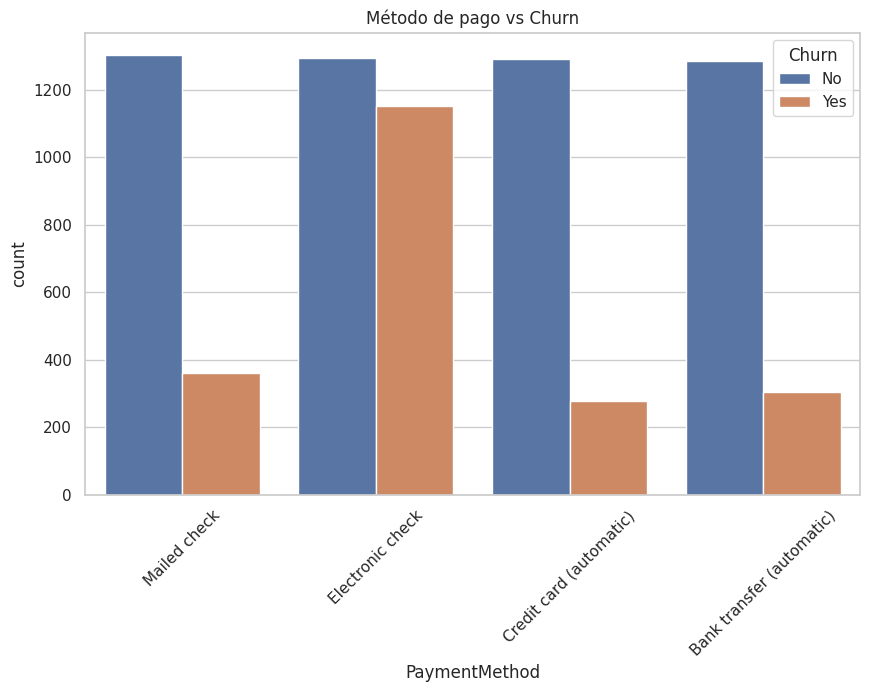

In [69]:
# Método de pago vs Churn
sns.countplot(data=datos, x="PaymentMethod", hue="Churn")
plt.xticks(rotation=45)
plt.title("Método de pago vs Churn")
plt.show()